In [15]:
from cnns.core import TorchOpenFace as tof
from cnns.utils import cnn_utils as cu
import cv2
import numpy as np
import pandas as pd
from cnns.core import SOMClusterer as scl
from sklearn.metrics.cluster import homogeneity_completeness_v_measure
from cnns.utils import clustering_utils as clu
import pickle as pkl
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples

In [16]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Playground

In [7]:
cluster_stats = scl_.compute_cluster_stats(cluster_df)

In [9]:
cluster_stats.columns

Index([u'avg_euclid_dist', u'cluster_idx', u'size', u'var'], dtype='object')

In [10]:
sorted_cluster_stats = cluster_stats.sort(columns=['avg_euclid_dist'])

In [14]:
cluster_df.columns

Index([u'f0', u'f1', u'f2', u'f3', u'f4', u'f5', u'f6', u'f7', u'f8', u'f9', 
       ...
       u'f120', u'f121', u'f122', u'f123', u'f124', u'f125', u'f126', u'f127',
       u'face_url', u'cluster_idx'],
      dtype='object', length=130)

In [16]:
cluster_map = clu.get_map_from_dataframe(cluster_df, 'face_url', 'cluster_idx')
clu.visualize_clusters(cluster_map, '/Users/babasarala/Desktop/face_clustering/openface/%i_visualization.html'%user_id)

In [23]:
sorted_cluster_stats[sorted_cluster_stats['size'] > 10]

,avg_euclid_dist,cluster_idx,size,var
4,0.468043,4,43,0.111799
34,0.597210,34,14,0.176826
28,0.639599,28,13,0.197128
2,0.691272,2,24,0.237537
19,0.707702,19,18,0.247356
6,0.711931,6,28,0.258499
3,0.746288,3,14,0.276595
12,0.776627,12,24,0.305592


In [18]:
ed = sorted_cluster_stats['avg_euclid_dist'].values
var = sorted_cluster_stats['var'].values

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


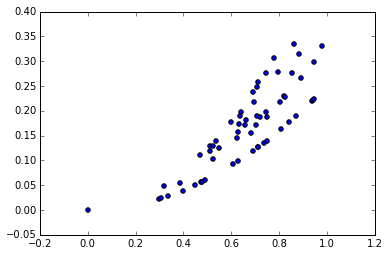

In [22]:
plt.scatter(ed, var)
plt.show()

Testing out Silhouette Samples

In [13]:
def visualize_silhouette_clusters(user_id, n_face_thresh=3, sil_coef_thresh=0):
    
    # paths
    results_dirpath = '/Users/babasarala/Desktop/face_clustering/openface_experiments'
    cluster_html_dirpath = '/Users/babasarala/Desktop/face_clustering/openface_experiments/cluster_htmls'
    cluster_html_filepath = '%s/%i_best_silhouette.html'%(cluster_html_dirpath, user_id)
    cluster_pkl_filepath = '%s/%i_cluster_stats.p'%(cluster_html_dirpath, user_id)
    
    # get the feature vectors...
    img_urls, X = pkl.load(open('%s/%i_cnn_codes.p'%(results_dirpath, user_id), 'rb'))
    
    # ...cluster...
    scl_ = scl.SOMClusterer(img_urls, X)
    cluster_df = scl_.run()
        
    # collect some metrics
    cluster_stats = scl_.create_cluster_stats(cluster_df)
    
    # visualize these clusters
    idxs = cluster_stats['cluster_idx'].values
    df = cluster_df[cluster_df['cluster_idx'].isin(idxs)]
    clustering_maps = clu.get_map_from_dataframe(df, 'face_url', 'cluster_idx')
    clu.visualize_clusters(clustering_maps, cluster_html_filepath)
    
    # save off the cluster stats
    pkl.dump(cluster_stats, open(cluster_pkl_filepath, 'wb'))

In [14]:
user_ids = [1946418, 8657185, 5626377, 5, 5692777, 3473194, 3928074, 4619758, 2685009, 1496616, 1341, 8, 34, 6007945]
for user_id in user_ids:
    visualize_silhouette_clusters(user_id)

In [108]:
# filter clusters based on thresh and compute 
num_faces_per_cluster = cluster_df['cluster_idx'].value_counts()
num_faces_per_cluster = num_faces_per_cluster[num_faces_per_cluster >= n_faces_thresh]
filt_cluster_idxs = num_faces_per_cluster.index.values
filt_cluster_df = cluster_df[cluster_df['cluster_idx'].isin(filt_cluster_idxs)]

X = filt_cluster_df[scl_.feat_cols].values
labels = filt_cluster_df['cluster_idx'].values
sil_coeffs = silhouette_samples(X, labels)

In [109]:
cluster_sil_coeff = pd.DataFrame({'cluster_idx': filt_cluster_df['cluster_idx'].values, 
                                  'sil_coeff': sil_coeffs})

In [119]:
cluster_stats = cluster_sil_coeff.groupby('cluster_idx')['sil_coeff'].agg({'mean_sil_coeff':np.mean, 'num_faces':len}).reset_index()

,cluster_idx,mean_sil_coeff,num_faces
0,0,0.410976,6
1,1,0.036850,5
2,2,0.022369,21
3,3,0.059135,11
4,4,-0.045493,35
5,5,-0.118422,15
6,6,0.045952,42
7,8,0.131586,4
8,9,0.210541,3
9,10,0.174837,6


In [ ]:
pkl.dump()

Interdistance

In [21]:
from scipy.spatial.distance import pdist

In [37]:
user_id = 1341
pickle_dirpath = '/Users/babasarala/Desktop/face_clustering/openface_experiments'
cnn_codes_filepath = '%s/%i_cnn_codes.p'%(pickle_dirpath, user_id)
img_urls, X = pkl.load(open(cnn_codes_filepath, 'rb'))

In [38]:
Y = pdist(X, 'euclidean')

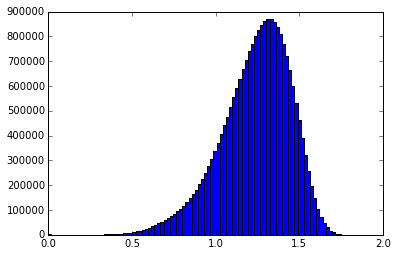

In [39]:
plt.hist(Y, bins=100)
plt.show()

6965778